In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

In [19]:
def get_data():
    data = load_svmlight_file("housing_scale")
    return data[0], data[1]

#Import data
X, y = get_data()

In [20]:
#Divide dataset into training set and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear Regression

$LossFunction =\frac{1}{2m}\sum_{i=1}^m(X_i*A +b - y_i)^2 $

$G_A =\frac{1}{m}\sum_{i=1}^m(X_i*A +b - y_i)*X_i $

$G_b =\frac{1}{m}\sum_{i=1}^m(X_i*A +b - y_i) $

In [21]:
def linearRegression(delta,n,X_train,y_train,X_test,y_test):
    #Initialize linear model parameters. Set all parameter into one
    A = np.ones(X.shape[1])
    b = 1
    
    trainCost = []
    validationCost = []
    for i in range(n):
        trainCost.append(np.sum(np.square(X_train*A + b - y_train))/ (2*X_train.shape[0]))
        validationCost.append(np.sum(np.square(X_test*A + b - y_test))/ (2*X_test.shape[0]))
        GA = (X_train*A + b - y_train)*X_train / X_train.shape[0]
        Gb = np.sum((X_train*A + b - y_train)) / X_train.shape[0]
        DA = -GA
        Db = -Gb
        A = A + delta*DA
        b = b + delta*Db
    return trainCost,validationCost

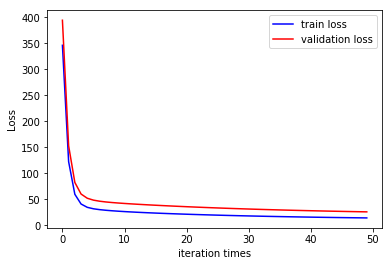

In [22]:
n = 50       #iteration time
delta = 0.1  #learning rate
t,v = linearRegression(delta,n,X_train,y_train,X_test,y_test)


plt.figure(1)
x = np.arange(0, n, 1)
plt.xlabel('iteration times')
plt.ylabel('Loss')
plt.plot(x,t,color="b",label = "train loss")
plt.plot(x,v,color="r",label = "validation loss")
plt.legend(loc='upper right')
plt.show()